In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/home/sendivogius/Pulpit/dane/driving_log.csv", sep=',', index_col=False, header=None, names=['center', 'left', 'right','steering_angle', 'throttle', 'brake','speed'])

In [3]:
df.head()

,center,left,right,steering_angle,throttle,brake,speed
0,/home/sendivogius/Pulpit/dane/IMG/center_2019_...,/home/sendivogius/Pulpit/dane/IMG/left_2019_05...,/home/sendivogius/Pulpit/dane/IMG/right_2019_0...,0.0,0.000000,0,0.000006
1,/home/sendivogius/Pulpit/dane/IMG/center_2019_...,/home/sendivogius/Pulpit/dane/IMG/left_2019_05...,/home/sendivogius/Pulpit/dane/IMG/right_2019_0...,0.0,0.162789,0,0.014478
2,/home/sendivogius/Pulpit/dane/IMG/center_2019_...,/home/sendivogius/Pulpit/dane/IMG/left_2019_05...,/home/sendivogius/Pulpit/dane/IMG/right_2019_0...,0.0,0.360381,0,0.330273
3,/home/sendivogius/Pulpit/dane/IMG/center_2019_...,/home/sendivogius/Pulpit/dane/IMG/left_2019_05...,/home/sendivogius/Pulpit/dane/IMG/right_2019_0...,0.0,0.618981,0,0.824032
4,/home/sendivogius/Pulpit/dane/IMG/center_2019_...,/home/sendivogius/Pulpit/dane/IMG/left_2019_05...,/home/sendivogius/Pulpit/dane/IMG/right_2019_0...,0.0,0.861116,0,1.608680


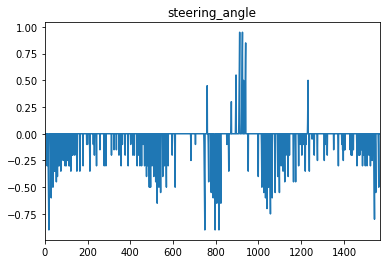

In [4]:
df.steering_angle.plot(title='steering_angle')

Display sample image

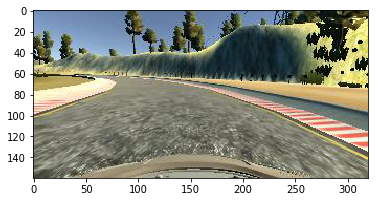

In [5]:
img = Image.open(df.center[0])
plt.imshow(img)

In [6]:
def load_image(img_path):
    return np.asarray(Image.open(img_path))

In [7]:
def process_image(img):
    return img[10:130:2, ::4, :]

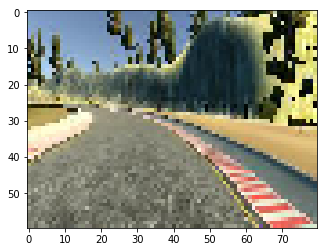

In [8]:
img = process_image(load_image(df.right[0]))
plt.imshow(img)

Create input and output data to feed into NN

In [9]:
X = [process_image(load_image(fn)) for fn in df.center]
X += [process_image(load_image(fn)) for fn in df.left]
X += [process_image(load_image(fn)) for fn in df.right]
X = np.array(X)

In [10]:
y = df.steering_angle.values
y = np.concatenate([y, y+.4, y-.4])

In [11]:
X.shape, y.shape

((4704, 60, 80, 3), (4704,))

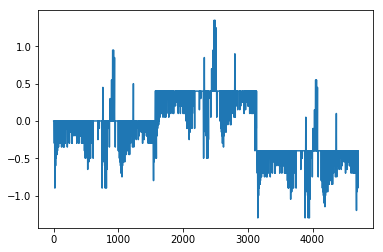

In [12]:
plt.plot(y)

In [13]:
np.save('X.npy', X)
np.save('y.npy', y)